In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
tf.__version__

'1.14.0'

In [2]:
base_dir = "./cats_and_dogs_filtered/"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
print('toal training cat  images:', len(os.listdir(train_cats_dir)))


# Directory with our training dogs pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
print('toal training dog images:', len(os.listdir(train_dogs_dir)))


# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
print('toal validation cat  images:', len(os.listdir(validation_cats_dir)))

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print('toal validation dog  images:', len(os.listdir(validation_dogs_dir)))


toal training cat  images: 1000
toal training dog images: 1000
toal validation cat  images: 500
toal validation dog  images: 500


In [3]:
image_size = 160
batch_size = 32

#Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

#Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size = (image_size, image_size),
                batch_size = batch_size,
                #since we use binary_crossentropy loss, we need binary labels
                class_mode='binary')

#Flow validation images in batches of  32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir,
                target_size = (image_size, image_size),
                batch_size = batch_size,
                #since we use binary_crossentropy loss, we need binary labels
                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
IMG_SHAPE = (image_size, image_size,3)

#Create the base model form the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')

W0807 08:36:39.682577 140205200013120 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [6]:
model = tf.keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

W0807 08:36:49.324972 140205200013120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [9]:
epochs = 10
#setps_per_epoch = np.ceil(train_generator.n / 32)
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs = epochs,
                             workers=4,
                             validation_data = validation_generator,
                             validation_steps = validation_steps)

Epoch 1/10
62/62 [==============================] - 33s 527ms/step - loss: 0.6529 - acc: 0.6138 - val_loss: 0.5903 - val_acc: 0.6865
Epoch 2/10
62/62 [==============================] - 30s 486ms/step - loss: 0.5238 - acc: 0.7485 - val_loss: 0.4652 - val_acc: 0.8014
Epoch 3/10
62/62 [==============================] - 30s 484ms/step - loss: 0.4402 - acc: 0.8115 - val_loss: 0.3702 - val_acc: 0.8619
Epoch 4/10
62/62 [==============================] - 30s 483ms/step - loss: 0.3937 - acc: 0.8511 - val_loss: 0.3293 - val_acc: 0.8679
Epoch 5/10
62/62 [==============================] - 30s 480ms/step - loss: 0.3578 - acc: 0.8608 - val_loss: 0.2877 - val_acc: 0.8881
Epoch 6/10
62/62 [==============================] - 30s 482ms/step - loss: 0.3137 - acc: 0.8918 - val_loss: 0.2631 - val_acc: 0.8942
Epoch 7/10
62/62 [==============================] - 30s 483ms/step - loss: 0.2977 - acc: 0.8933 - val_loss: 0.2618 - val_acc: 0.8911
Epoch 8/10
62/62 [==============================] - 30s 479ms/step - 

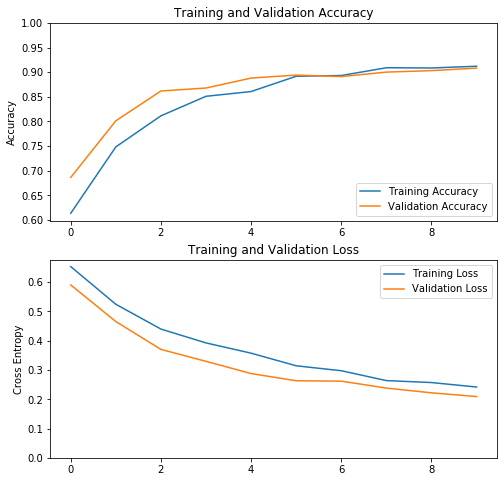

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')


plt.subplot(2,1,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [11]:
base_model.trainable = True

In [12]:
print('Number of layers in the base model:', len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


Number of layers in the base model: 155


In [13]:
#Compile the model using a much-lower  training rate.
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [15]:
len(model.trainable_variables)

58

In [16]:
epochs = 50
#setps_per_epoch = np.ceil(train_generator.n / 32)
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
steps_per_epoch

62

In [17]:
historoy_fine = model.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs,
                                   workers=4,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps)

Epoch 1/50
62/62 [==============================] - 45s 729ms/step - loss: 0.1677 - acc: 0.9482 - val_loss: 0.1070 - val_acc: 0.9617
Epoch 2/50
62/62 [==============================] - 38s 616ms/step - loss: 0.1040 - acc: 0.9624 - val_loss: 0.0984 - val_acc: 0.9627
Epoch 3/50
62/62 [==============================] - 38s 613ms/step - loss: 0.0717 - acc: 0.9797 - val_loss: 0.0910 - val_acc: 0.9677
Epoch 4/50
62/62 [==============================] - 38s 614ms/step - loss: 0.0441 - acc: 0.9898 - val_loss: 0.0973 - val_acc: 0.9667
Epoch 5/50
62/62 [==============================] - 38s 614ms/step - loss: 0.0375 - acc: 0.9919 - val_loss: 0.0964 - val_acc: 0.9688
Epoch 6/50
62/62 [==============================] - 38s 612ms/step - loss: 0.0189 - acc: 0.9985 - val_loss: 0.0952 - val_acc: 0.9708
Epoch 7/50
62/62 [==============================] - 38s 619ms/step - loss: 0.0143 - acc: 0.9985 - val_loss: 0.0937 - val_acc: 0.9748
Epoch 8/50
62/62 [==============================] - 38s 607ms/step - 

In [18]:
acc += historoy_fine.history['acc']
val_acc += historoy_fine.history['val_acc']

loss += historoy_fine.history['loss']
val_loss += historoy_fine.history['val_loss']

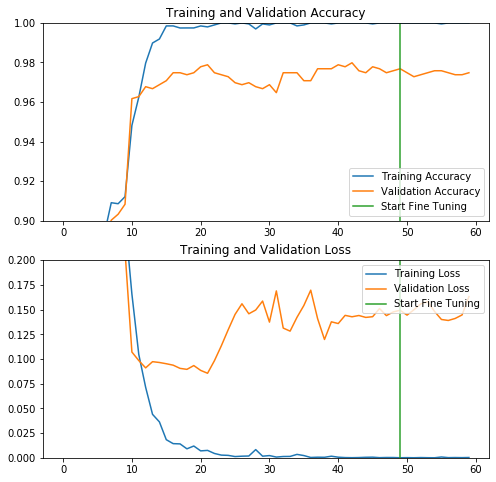

In [19]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1, epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(2,1,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1, epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
